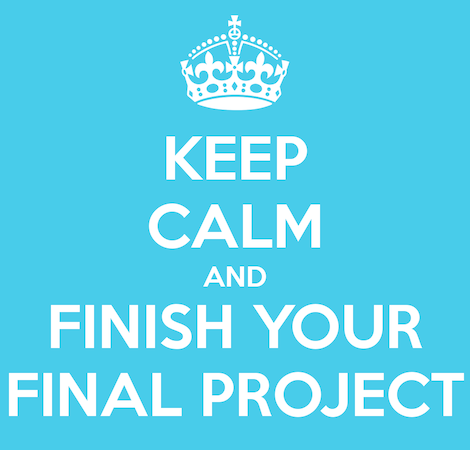

# Overview

<p style="line-height:1.75;font-size:16px">
It's time to put your skills to the test and take on a real-world data science project. You are given a dataset of ad impressions for Android users for a particular ad. Each line represents one impression for that ad and includes details such as timestamp, device, mobile carrier and more.

<p style="line-height:1.75;font-size:16px">
Your task is to predict if a user will click or not on the ad.

# Guidelines

<p style="line-height:1.75;font-size:16px">
You will have two weeks to complete this project during which we will have two half-days dedicated to this. Besides giving you the chance to gain experience and showcase what you've learned, this project is intended to give you a glimpse into the actual process and work of a data scientist.<br> Before we talk about the task itself, here are some important guidelines:<br>
1\. <b>Show your work</b> - if you've tried something and it didn't work that's fine, don't delete it. Data science is an iterative process and we can learn a lot from what didn't work. Explain what didn't work and the reasons for it.<br>
2\. <b>Explain your work</b> - don't just write a bunch of code and the final output. Explain the motivation for each step you take, describe the results you got and what they mean. <br>
3\. <b>Use visualizations</b> - while exploring the data or when trying to convey an important message, use plots to help you. That being said, don't force yourself to add plots if they're not really needed.<br>
4\. <b>Plan ahead</b> - if you start working on the project near the submission date you will have less time to ask questions and come up with ideas.<br>
5\. <b>Google is your friend</b> - while we've learned the basic skills required to complete this project, there are many other techniques and ideas we didn't have time to talk about. Don't limit yourself to the lessons, search for similar problems and how to approach them, exchange ideas with colleagues and don't be afraid to try new ideas. <br>
6\. <b>It's not about the score</b> - while reaching a good prediction score is nice, it's not the main purpose of this project. Use this project to show your understanding and reasoning as well as your technical skills.<br>
7\. <b>Write clean code</b> - make sure you write code that is easy to read and understand. Give meaningful names, use functions, add comments if needed.<br>
8\. <b>Test before submission</b> - your work should be submitted as a Jupyter Notebook. Before submitting it, make sure you run it from start to finish and verify that there are no errors.<br>
9\. <b>Enjoy it</b> - try to have fun working on this, be curious, look for interesting insights and take pride in completing a real-world project end-to-end.

# Tips

<p style="line-height:1.75;font-size:16px">
1\. Since the data is time sensitive, split it so that the test data will be the last month of data and the training data will be anything that came before that.<br>
2\. `play_apps.zip` is data from Google Play about the various apps in the dataset. You can use this to augment the impressions dataset.<br>
3\. The data is collected from customers in the US (multiple timezones).<br>

# Answer
### Read csv

In [1]:
import pandas as pd

data = pd.read_csv('data/android_bids_us.csv')
data.drop(['bidid'], axis=1, inplace=True)
data.head()

,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
0,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0
1,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0
2,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0
3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0
4,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0


### Add columns from app_id

In [34]:
print(data.app_id.sort_values().head(50))

2107799                        Ibtikar.Applications.Ibaloot
2988792                        Ibtikar.Applications.Ibaloot
1623323                        Ibtikar.Applications.Ibaloot
1556534                        Ibtikar.Applications.Ibaloot
2009330                                      abc.FeetlyDash
2657550    abc.kids.preschool.learning.phonics.songs.videos
2906273    abc.kids.preschool.learning.phonics.songs.videos
161989     abc.kids.preschool.learning.phonics.songs.videos
157941     abc.kids.preschool.learning.phonics.songs.videos
195438     abc.kids.preschool.learning.phonics.songs.videos
2444956    abc.kids.preschool.learning.phonics.songs.videos
2377395    abc.kids.preschool.learning.phonics.songs.videos
2013977    abc.kids.preschool.learning.phonics.songs.videos
1505586    abc.kids.preschool.learning.phonics.songs.videos
393248     abc.kids.preschool.learning.phonics.songs.videos
443469     abc.kids.preschool.learning.phonics.songs.videos
1791127    abc.kids.preschool.learning.p

In [3]:
from zipfile import ZipFile
import pickle

app_details = ZipFile("data/play_apps.zip")
app_file = 'play_apps/air.BRFree'
app = pickle.loads(app_details.read(app_file))
app['category']

['GAME_SPORTS']

In [2]:
from zipfile import ZipFile
import pickle

app_details = ZipFile("data/play_apps.zip")

categories = []
scores = []
reviews_list = []
free_list = []
for app_id in data.app_id:
    try:
        app_file = 'play_apps/' + app_id
        app = pickle.loads(app_details.read(app_file))
        value = app['category']
        score = float(app['score'])
        reviews = app['reviews']
        free = int(app['free'])
    except:
        value = []
        score = 0.0
        reviews = 0
        free = 0 # I assume Free apps get more banner, so default is paid app
    finally:
        categories.append(value)
        scores.append(score)
        reviews_list.append(reviews)
        free_list.append(free)

In [3]:
data['app_category'] = pd.Series(categories, index =data['app_id'].index)
data['app_scores'] = pd.Series(scores, index =data['app_id'].index)
data['app_reviews_list'] = pd.Series(reviews_list, index =data['app_id'].index)
data['app_free_list'] = pd.Series(free_list, index =data['app_id'].index)

In [4]:
data.drop(['app_id'], axis=1, inplace=True)
data

,utc_time,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,app_category,app_scores,app_reviews_list,app_free_list
0,1536444331894,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0,[GAME_SIMULATION],4.3,155129,1
1,1536444363932,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0,[GAME_CARD],4.7,11927,1
2,1536444386908,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0,[GAME_ARCADE],4.1,178,1
3,1536444405023,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0,[],0.0,0,0
4,1536444443458,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0,"[GAME_EDUCATIONAL, FAMILY_BRAINGAMES]",3.6,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148823,1541472458853,TX,T-Mobile USA,Samsung,SM-J327T1,7.0,720,1280,chartboost,0,[GAME_ACTION],4.3,18839,1
3148824,1541472485093,GA,Mediacom Cable,NaN,NaN,8.1.0,1920,1080,chartboost,0,[GAME_CASINO],4.6,15165,1
3148825,1541472516760,MO,Sprint PCS,LG,SP200,7.1.2,1280,720,chartboost,0,[GAME_CASUAL],4.6,17264,1
3148826,1541472552347,WI,Spectrum,Motorola,Moto G Plus (5th Gen.),7.0,1080,1920,chartboost,0,[GAME_ADVENTURE],4.6,303827,1


# Remove lines that had exceptions

In [6]:
data.to_parquet('data/android_bids_app_id_data.parquet.gzip',compression='gzip')

In [29]:
import pandas as pd
data = pd.read_parquet('data/android_bids_app_id_data.parquet.gzip')
data

,utc_time,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,app_category,app_scores,app_reviews_list,app_free_list
0,1536444331894,TX,AT&T Wireless,None,None,7.0,720,1280,chartboost,0,[GAME_SIMULATION],4.3,155129,1
1,1536444363932,TX,T-Mobile USA,None,None,7.0,1280,720,chartboost,0,[GAME_CARD],4.7,11927,1
2,1536444386908,LA,AT&T Wireless,None,None,7.1.1,720,1280,chartboost,0,[GAME_ARCADE],4.1,178,1
3,1536444405023,TN,Comcast Cable,None,None,6.0.1,720,1280,chartboost,0,[],0.0,0,0
4,1536444443458,NC,AT&T U-verse,None,None,7.1.1,1024,768,chartboost,0,"[GAME_EDUCATIONAL, FAMILY_BRAINGAMES]",3.6,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148823,1541472458853,TX,T-Mobile USA,Samsung,SM-J327T1,7.0,720,1280,chartboost,0,[GAME_ACTION],4.3,18839,1
3148824,1541472485093,GA,Mediacom Cable,None,None,8.1.0,1920,1080,chartboost,0,[GAME_CASINO],4.6,15165,1
3148825,1541472516760,MO,Sprint PCS,LG,SP200,7.1.2,1280,720,chartboost,0,[GAME_CASUAL],4.6,17264,1
3148826,1541472552347,WI,Spectrum,Motorola,Moto G Plus (5th Gen.),7.0,1080,1920,chartboost,0,[GAME_ADVENTURE],4.6,303827,1


In [31]:
data.drop(data[(data.app_free_list == 0) & (data.app_reviews_list == 0) & (data.app_scores == 0.0)].index, inplace=True)
data.reset_index(inplace=True)
data

,index,utc_time,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,app_category,app_scores,app_reviews_list,app_free_list
0,0,1536444331894,TX,AT&T Wireless,None,None,7.0,720,1280,chartboost,0,[GAME_SIMULATION],4.3,155129,1
1,1,1536444363932,TX,T-Mobile USA,None,None,7.0,1280,720,chartboost,0,[GAME_CARD],4.7,11927,1
2,2,1536444386908,LA,AT&T Wireless,None,None,7.1.1,720,1280,chartboost,0,[GAME_ARCADE],4.1,178,1
3,4,1536444443458,NC,AT&T U-verse,None,None,7.1.1,1024,768,chartboost,0,"[GAME_EDUCATIONAL, FAMILY_BRAINGAMES]",3.6,35,1
4,5,1536444487429,FL,T-Mobile USA,None,None,7.0,720,1280,chartboost,0,[GAME_SIMULATION],3.6,3891,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841391,3148823,1541472458853,TX,T-Mobile USA,Samsung,SM-J327T1,7.0,720,1280,chartboost,0,[GAME_ACTION],4.3,18839,1
2841392,3148824,1541472485093,GA,Mediacom Cable,None,None,8.1.0,1920,1080,chartboost,0,[GAME_CASINO],4.6,15165,1
2841393,3148825,1541472516760,MO,Sprint PCS,LG,SP200,7.1.2,1280,720,chartboost,0,[GAME_CASUAL],4.6,17264,1
2841394,3148826,1541472552347,WI,Spectrum,Motorola,Moto G Plus (5th Gen.),7.0,1080,1920,chartboost,0,[GAME_ADVENTURE],4.6,303827,1


### MultiLabelBinarizer

In [32]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_mlb = mlb.fit_transform(data['app_category'])
genre_mlb

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
df = pd.DataFrame(genre_mlb, columns=mlb.classes_)
df

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2841392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2841393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2841394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.describe()

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
count,2.841396e+06,2.841396e+06,2.841396e+06,2.841396e+06,2.841396e+06,2.841396e+06,2.841396e+06,2.841396e+06,2.841396e+06,2.841396e+06,...,2.841396e+06,2.841396e+06,2.841396e+06,2.841396e+06,2.841396e+06,2.841396e+06,2.841396e+06,2.841396e+06,2.841396e+06,2.841396e+06
mean,2.087002e-04,8.263544e-04,3.554591e-04,2.885905e-04,6.299720e-05,8.045341e-04,2.463578e-06,6.088556e-05,6.581272e-03,1.556559e-02,...,5.600416e-03,5.370600e-04,1.341594e-03,1.214192e-04,1.292674e-03,6.778358e-04,1.569299e-03,1.513341e-05,1.675233e-04,4.715992e-05
std,1.444496e-02,2.873451e-02,1.885027e-02,1.698550e-02,7.936829e-03,2.835290e-02,1.569577e-03,7.802684e-03,8.085766e-02,1.237873e-01,...,7.462609e-02,2.316833e-02,3.660321e-02,1.101837e-02,3.593054e-02,2.602646e-02,3.958329e-02,3.890139e-03,1.294200e-02,6.867147e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [34]:
data = pd.concat([data, df], axis=1)
data

,index,utc_time,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,0,1536444331894,TX,AT&T Wireless,None,None,7.0,720,1280,chartboost,...,0,0,0,0,0,0,0,0,0,0
1,1,1536444363932,TX,T-Mobile USA,None,None,7.0,1280,720,chartboost,...,0,0,0,0,0,0,0,0,0,0
2,2,1536444386908,LA,AT&T Wireless,None,None,7.1.1,720,1280,chartboost,...,0,0,0,0,0,0,0,0,0,0
3,4,1536444443458,NC,AT&T U-verse,None,None,7.1.1,1024,768,chartboost,...,0,0,0,0,0,0,0,0,0,0
4,5,1536444487429,FL,T-Mobile USA,None,None,7.0,720,1280,chartboost,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841391,3148823,1541472458853,TX,T-Mobile USA,Samsung,SM-J327T1,7.0,720,1280,chartboost,...,0,0,0,0,0,0,0,0,0,0
2841392,3148824,1541472485093,GA,Mediacom Cable,None,None,8.1.0,1920,1080,chartboost,...,0,0,0,0,0,0,0,0,0,0
2841393,3148825,1541472516760,MO,Sprint PCS,LG,SP200,7.1.2,1280,720,chartboost,...,0,0,0,0,0,0,0,0,0,0
2841394,3148826,1541472552347,WI,Spectrum,Motorola,Moto G Plus (5th Gen.),7.0,1080,1920,chartboost,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data.to_parquet('data/android_bids_app_id_data_one_hot_encoder.parquet.gzip',compression='gzip')

### utc time -> local time

In [36]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone
import pytz

In [37]:
states_tz = {
    'WA': 'US/Pacific',
    'OR': 'US/Pacific',
    'CA': 'US/Pacific',
    'NV': 'US/Pacific',
    'MT': 'US/Mountain',
    'ID': 'US/Mountain',
    'WY': 'US/Mountain',
    'UT': 'US/Mountain',
    'CO': 'US/Mountain',
    'NM': 'US/Mountain',
    'AZ': 'US/Mountain',
    'TX': 'US/Central',
    'OK': 'US/Central',
    'KS': 'US/Central',
    'MN': 'US/Central',
    'IA': 'US/Central',
    'MO': 'US/Central',
    'AR': 'US/Central',
    'LA': 'US/Central',
    'ND': 'US/Central',
    'SD': 'US/Central',
    'NE': 'US/Central',
    'WI': 'US/Central',
    'IL': 'US/Central',
    'MS': 'US/Central',
    'MI': 'US/Eastern',
    'VT': 'US/Eastern',
    'NH': 'US/Eastern',
    'ME': 'US/Eastern',
    'MA': 'US/Eastern',
    'RI': 'US/Eastern',
    'CT': 'US/Eastern',
    'OH': 'US/Eastern',
    'PA': 'US/Eastern',
    'NJ': 'US/Eastern',
    'KY': 'US/Eastern',
    'WV': 'US/Eastern',
    'MD': 'US/Eastern',
    'DE': 'US/Eastern',
    'VA': 'US/Eastern',
    'NC': 'US/Eastern',
    'SC': 'US/Eastern',
    'GA': 'US/Eastern',
    'NY': 'US/Eastern',
    'TN': 'US/Eastern',
    'IN': 'US/Eastern',
    'AL': 'US/Eastern',
    'FL': 'US/Eastern',
    'DC': 'US/Eastern',
    'HI': 'US/Hawaii',
    'AK': 'US/Alaska'
}

In [38]:
def convert_utc_time(r):
    tzone, timestamp = r.split('@')
    x = datetime.fromtimestamp(float(timestamp)/1000).replace(tzinfo=timezone.utc).astimezone(pytz.timezone(tzone)).timetuple()
    return list(x)[0:6]

In [39]:
data['TZ'] = data.apply(lambda r: states_tz[r['user_state']] + '@' + str(r['utc_time']), axis=1)
data['year'], data['month'] ,data['day'],data['hour'],data['minute'],data['sec']= zip(*data['TZ'].map(convert_utc_time))
data.drop(['TZ'], axis=1, inplace=True)
data

,index,utc_time,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,...,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,year,month,day,hour,minute,sec
0,0,1536444331894,TX,AT&T Wireless,None,None,7.0,720,1280,chartboost,...,0,0,0,0,2018,9,8,20,5,31
1,1,1536444363932,TX,T-Mobile USA,None,None,7.0,1280,720,chartboost,...,0,0,0,0,2018,9,8,20,6,3
2,2,1536444386908,LA,AT&T Wireless,None,None,7.1.1,720,1280,chartboost,...,0,0,0,0,2018,9,8,20,6,26
3,4,1536444443458,NC,AT&T U-verse,None,None,7.1.1,1024,768,chartboost,...,0,0,0,0,2018,9,8,21,7,23
4,5,1536444487429,FL,T-Mobile USA,None,None,7.0,720,1280,chartboost,...,0,0,0,0,2018,9,8,21,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841391,3148823,1541472458853,TX,T-Mobile USA,Samsung,SM-J327T1,7.0,720,1280,chartboost,...,0,0,0,0,2018,11,5,22,47,38
2841392,3148824,1541472485093,GA,Mediacom Cable,None,None,8.1.0,1920,1080,chartboost,...,0,0,0,0,2018,11,5,23,48,5
2841393,3148825,1541472516760,MO,Sprint PCS,LG,SP200,7.1.2,1280,720,chartboost,...,0,0,0,0,2018,11,5,22,48,36
2841394,3148826,1541472552347,WI,Spectrum,Motorola,Moto G Plus (5th Gen.),7.0,1080,1920,chartboost,...,0,0,0,0,2018,11,5,22,49,12


### Enough to know which hour the user saw the banner

In [40]:
data.drop(['utc_time', 'minute', 'sec'], axis=1, inplace=True)

### Save data with local time per user

In [41]:
data.to_parquet('data/android_bids_us_local_time.parquet.gzip',compression='gzip')

In [10]:
import pandas as pd
data = pd.read_parquet('data/android_bids_us_local_time.parquet.gzip')
data

,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,year,month,day,hour
0,com.OppanaGames.CarSim,TX,AT&T Wireless,None,None,7.0,720,1280,chartboost,0,2018,9,8,20
1,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,None,None,7.0,1280,720,chartboost,0,2018,9,8,20
2,com.kuttigames.tenkyurollball,LA,AT&T Wireless,None,None,7.1.1,720,1280,chartboost,0,2018,9,8,20
3,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,None,None,6.0.1,720,1280,chartboost,0,2018,9,8,21
4,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,None,None,7.1.1,1024,768,chartboost,0,2018,9,8,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148823,com.altitude.rrsv,TX,T-Mobile USA,Samsung,SM-J327T1,7.0,720,1280,chartboost,0,2018,11,5,22
3148824,com.slots.realvegas,GA,Mediacom Cable,None,None,8.1.0,1920,1080,chartboost,0,2018,11,5,23
3148825,br.com.tapps.penguinevolution,MO,Sprint PCS,LG,SP200,7.1.2,1280,720,chartboost,0,2018,11,5,22
3148826,air.com.FDGEntertainment.Lonewolf.gp,WI,Spectrum,Motorola,Moto G Plus (5th Gen.),7.0,1080,1920,chartboost,0,2018,11,5,22


### Only 1 'marketplace','year' -> no learning

In [68]:
data['year'].value_counts()

2018    3148828
Name: year, dtype: int64

In [42]:
data.drop(['year'], axis=1, inplace=True)
data

,index,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,...,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,month,day,hour
0,0,TX,AT&T Wireless,None,None,7.0,720,1280,chartboost,0,...,0,0,0,0,0,0,0,9,8,20
1,1,TX,T-Mobile USA,None,None,7.0,1280,720,chartboost,0,...,0,0,0,0,0,0,0,9,8,20
2,2,LA,AT&T Wireless,None,None,7.1.1,720,1280,chartboost,0,...,0,0,0,0,0,0,0,9,8,20
3,4,NC,AT&T U-verse,None,None,7.1.1,1024,768,chartboost,0,...,0,0,0,0,0,0,0,9,8,21
4,5,FL,T-Mobile USA,None,None,7.0,720,1280,chartboost,0,...,0,0,0,0,0,0,0,9,8,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841391,3148823,TX,T-Mobile USA,Samsung,SM-J327T1,7.0,720,1280,chartboost,0,...,0,0,0,0,0,0,0,11,5,22
2841392,3148824,GA,Mediacom Cable,None,None,8.1.0,1920,1080,chartboost,0,...,0,0,0,0,0,0,0,11,5,23
2841393,3148825,MO,Sprint PCS,LG,SP200,7.1.2,1280,720,chartboost,0,...,0,0,0,0,0,0,0,11,5,22
2841394,3148826,WI,Spectrum,Motorola,Moto G Plus (5th Gen.),7.0,1080,1920,chartboost,0,...,0,0,0,0,0,0,0,11,5,22


In [43]:
data.sort_values(by=['month', 'day', 'hour'], inplace=True)
data

,index,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,...,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,month,day,hour
463315,514417,HI,Spectrum,None,None,7.1.1,1280,800,chartboost,0,...,0,0,0,0,0,0,0,8,6,11
541421,601035,HI,Hawaiian Telcom,None,None,6.0.1,1536,864,chartboost,0,...,0,0,0,0,0,0,0,8,6,11
541437,601051,HI,Hawaiian Telcom,None,None,6.0.1,1536,864,chartboost,0,...,0,0,0,0,0,0,0,8,6,11
532315,591059,AK,GCI Communications,None,None,8.0.0,1920,1080,chartboost,0,...,0,0,0,0,0,0,0,8,6,13
2796043,3098702,HI,Spectrum,None,None,8.0.0,1440,810,chartboost,0,...,0,0,0,0,0,0,0,8,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256680,285341,PA,T-Mobile USA,Samsung,SM-T820,8.0.0,1280,720,chartboost,0,...,0,0,0,0,0,0,0,11,19,9
257027,285726,FL,Spectrum,LG,LM-X210(G),7.1.2,720,1280,chartboost,1,...,0,0,0,0,0,0,0,11,19,9
257379,286127,FL,T-Mobile USA,Samsung,SM-J327T1,7.0,720,1280,chartboost,0,...,0,0,0,0,0,0,0,11,19,9
257381,286129,MI,T-Mobile USA,Samsung,SM-N920T,7.0,1920,1080,chartboost,0,...,0,0,0,0,0,0,0,11,19,9


In [44]:
data.to_parquet('data/android_bids_us_local_time_sorted.parquet.gzip',compression='gzip')

In [47]:
import pandas as pd
data = pd.read_parquet('data/android_bids_us_local_time_sorted.parquet.gzip')
data

,index,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,...,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,month,day,hour
level_0,,,,,,,,,,,,,,,,,,,,,
463315,514417,HI,Spectrum,None,None,7.1.1,1280,800,chartboost,0,...,0,0,0,0,0,0,0,8,6,11
541421,601035,HI,Hawaiian Telcom,None,None,6.0.1,1536,864,chartboost,0,...,0,0,0,0,0,0,0,8,6,11
541437,601051,HI,Hawaiian Telcom,None,None,6.0.1,1536,864,chartboost,0,...,0,0,0,0,0,0,0,8,6,11
532315,591059,AK,GCI Communications,None,None,8.0.0,1920,1080,chartboost,0,...,0,0,0,0,0,0,0,8,6,13
2796043,3098702,HI,Spectrum,None,None,8.0.0,1440,810,chartboost,0,...,0,0,0,0,0,0,0,8,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256680,285341,PA,T-Mobile USA,Samsung,SM-T820,8.0.0,1280,720,chartboost,0,...,0,0,0,0,0,0,0,11,19,9
257027,285726,FL,Spectrum,LG,LM-X210(G),7.1.2,720,1280,chartboost,1,...,0,0,0,0,0,0,0,11,19,9
257379,286127,FL,T-Mobile USA,Samsung,SM-J327T1,7.0,720,1280,chartboost,0,...,0,0,0,0,0,0,0,11,19,9


In [45]:
data = pd.get_dummies(data)
data

MemoryError: Unable to allocate 5.89 GiB for an array with shape (2841396, 2225) and data type uint8

In [74]:
data.to_parquet('data/android_bids_us_get_dummies.parquet.gzip',compression='gzip')

In [ ]:
import pandas as pd
data = pd.read_parquet('data/android_bids_us_local_time.parquet.gzip')
data

In [48]:
data.columns

Index(['index', 'user_state', 'user_isp', 'device_maker', 'device_model',
       'device_osv', 'device_height', 'device_width', 'marketplace', 'click',
       'app_category', 'app_scores', 'app_reviews_list', 'app_free_list',
       'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'EVENTS', 'FAMILY_ACTION', 'FAMILY_BRAINGAMES',
       'FAMILY_CREATE', 'FAMILY_EDUCATION', 'FAMILY_MUSICVIDEO',
       'FAMILY_PRETEND', 'FINANCE', 'FOOD_AND_DRINK', 'GAME_ACTION',
       'GAME_ADVENTURE', 'GAME_ARCADE', 'GAME_BOARD', 'GAME_CARD',
       'GAME_CASINO', 'GAME_CASUAL', 'GAME_EDUCATIONAL', 'GAME_MUSIC',
       'GAME_PUZZLE', 'GAME_RACING', 'GAME_ROLE_PLAYING', 'GAME_SIMULATION',
       'GAME_SPORTS', 'GAME_STRATEGY', 'GAME_TRIVIA', 'GAME_WORD',
       'HEALTH_AND_FITNESS', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MUSIC_AND_AUDIO', 'NEWS_AND_MAGAZINES',
   

In [49]:
data.drop(['user_isp', 'device_maker', 'device_model', 'device_osv', 'marketplace', 'app_category'], axis=1, inplace=True)

In [50]:
data.to_parquet('data/android_bids_us_dropped_for_memory.parquet.gzip',compression='gzip')

In [60]:
states = pd.get_dummies(data['user_state'])
states

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
level_0,,,,,,,,,,,,,,,,,,,,,
463315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
532315,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2796043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257027,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
257379,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [61]:
data = pd.concat([data, states], axis=1)
data.drop(['user_state'], axis=1, inplace=True)

,index,user_state,device_height,device_width,click,app_scores,app_reviews_list,app_free_list,ART_AND_DESIGN,AUTO_AND_VEHICLES,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
level_0,,,,,,,,,,,,,,,,,,,,,
463315,514417,HI,1280,800,0,4.3,437699,1,0,0,...,0,0,0,0,0,0,0,0,0,0
541421,601035,HI,1536,864,0,4.5,179651,1,0,0,...,0,0,0,0,0,0,0,0,0,0
541437,601051,HI,1536,864,0,4.5,179651,1,0,0,...,0,0,0,0,0,0,0,0,0,0
532315,591059,AK,1920,1080,0,4.3,1159,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2796043,3098702,HI,1440,810,0,4.6,24130,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256680,285341,PA,1280,720,0,4.3,2723,1,0,0,...,0,0,0,0,0,0,0,0,0,0
257027,285726,FL,720,1280,1,4.1,9328,1,0,0,...,0,0,0,0,0,0,0,0,0,0
257379,286127,FL,720,1280,0,4.4,35432,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
data

,index,device_height,device_width,click,app_scores,app_reviews_list,app_free_list,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
level_0,,,,,,,,,,,,,,,,,,,,,
463315,514417,1280,800,0,4.3,437699,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541421,601035,1536,864,0,4.5,179651,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541437,601051,1536,864,0,4.5,179651,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
532315,591059,1920,1080,0,4.3,1159,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2796043,3098702,1440,810,0,4.6,24130,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256680,285341,1280,720,0,4.3,2723,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257027,285726,720,1280,1,4.1,9328,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257379,286127,720,1280,0,4.4,35432,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
data.to_parquet('data/android_bids_us_fix_states.parquet.gzip',compression='gzip')

### About 7% clicks

In [54]:
data['click'].value_counts()
print(f'click rate: {191029/2650367}')

click rate: 0.07207643318830939


# Histograms
### I do not see any linear dependency between features, or any evidence that could lead to feature selection

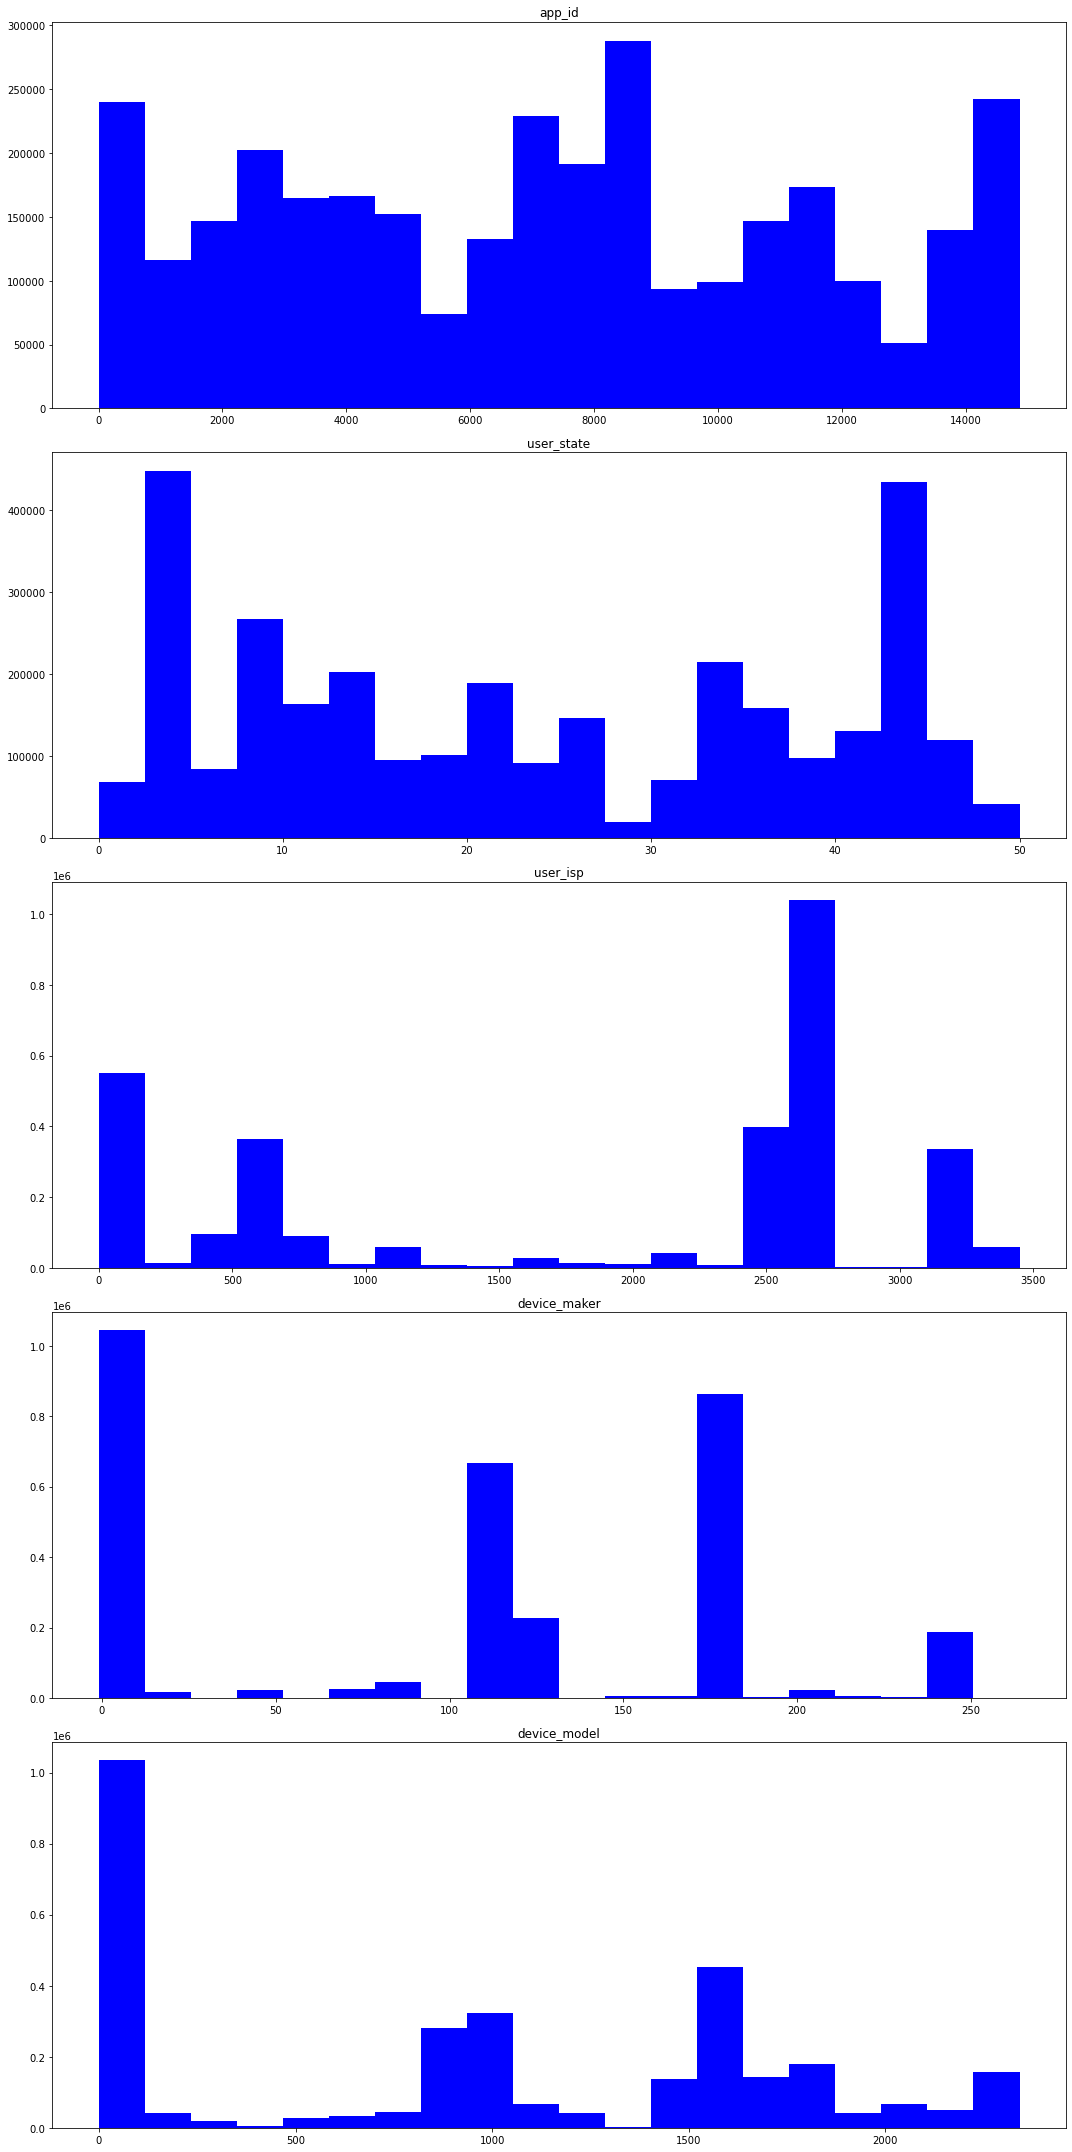

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15,30))

columns = ['app_id', 'user_state', 'user_isp', 'device_maker', 'device_model']
for i, column in zip(range(1 , 6) ,columns):
    ax = fig.add_subplot(5, 1, i)
    ax.hist(data[column], bins=20, color='blue')
    ax.set_title(column)
    
# Adjusts the padding of plots so that they fit nicely in the figure
fig.tight_layout()

plt.show()

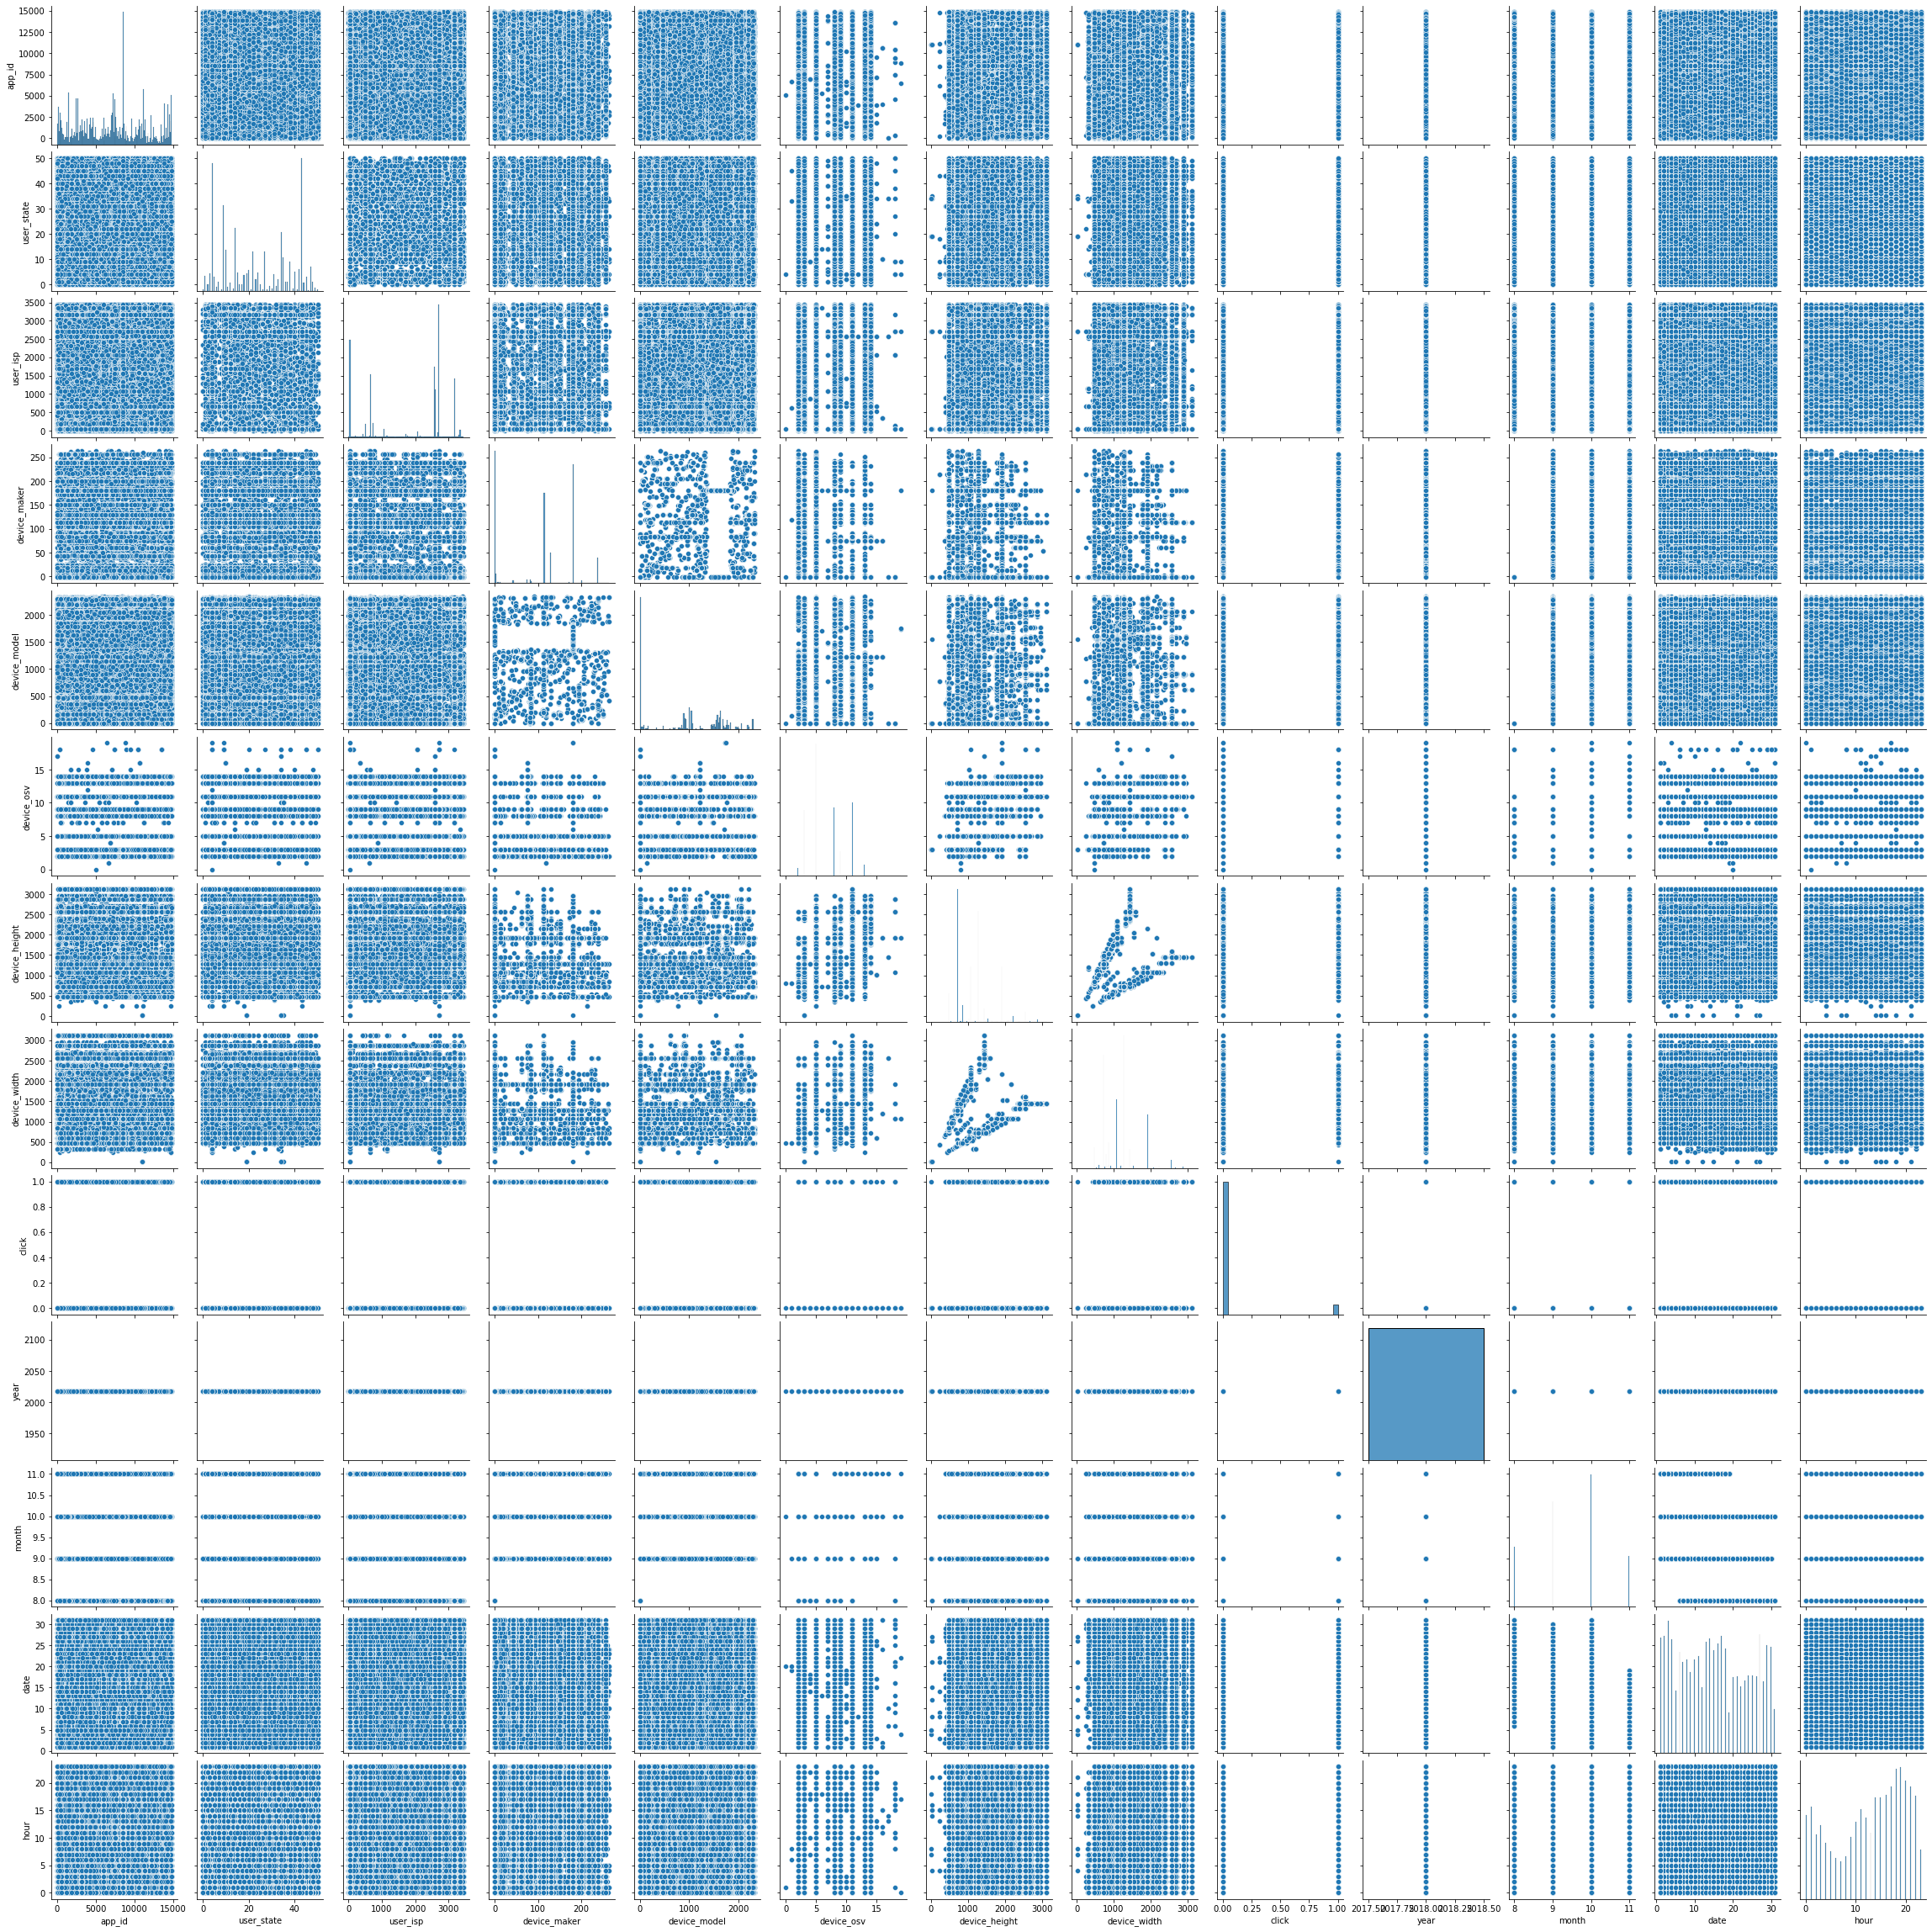

In [35]:
import seaborn as sns

sns.pairplot(data)

In [55]:
{column: data[column].isnull().sum() for column in data.columns}

{'index': 0,
 'user_state': 0,
 'device_height': 0,
 'device_width': 0,
 'click': 0,
 'app_scores': 0,
 'app_reviews_list': 0,
 'app_free_list': 0,
 'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 0,
 'BEAUTY': 0,
 'BOOKS_AND_REFERENCE': 0,
 'BUSINESS': 0,
 'COMICS': 0,
 'COMMUNICATION': 0,
 'DATING': 0,
 'EDUCATION': 0,
 'ENTERTAINMENT': 0,
 'EVENTS': 0,
 'FAMILY_ACTION': 0,
 'FAMILY_BRAINGAMES': 0,
 'FAMILY_CREATE': 0,
 'FAMILY_EDUCATION': 0,
 'FAMILY_MUSICVIDEO': 0,
 'FAMILY_PRETEND': 0,
 'FINANCE': 0,
 'FOOD_AND_DRINK': 0,
 'GAME_ACTION': 0,
 'GAME_ADVENTURE': 0,
 'GAME_ARCADE': 0,
 'GAME_BOARD': 0,
 'GAME_CARD': 0,
 'GAME_CASINO': 0,
 'GAME_CASUAL': 0,
 'GAME_EDUCATIONAL': 0,
 'GAME_MUSIC': 0,
 'GAME_PUZZLE': 0,
 'GAME_RACING': 0,
 'GAME_ROLE_PLAYING': 0,
 'GAME_SIMULATION': 0,
 'GAME_SPORTS': 0,
 'GAME_STRATEGY': 0,
 'GAME_TRIVIA': 0,
 'GAME_WORD': 0,
 'HEALTH_AND_FITNESS': 0,
 'LIBRARIES_AND_DEMO': 0,
 'LIFESTYLE': 0,
 'MAPS_AND_NAVIGATION': 0,
 'MUSIC_AND_AUDIO': 0,
 'NEWS_AND_MAGAZ

### Take earlies 80% as train, and rest as test

In [68]:
import numpy as np

train, test = np.split(data, [int(.8*len(data))])
x_train = train.drop(['click'], axis=1)
y_train = train['click']
x_test = test.drop(['click'], axis=1)
y_test = test['click']

### The click rate is mantained while splitting data to train and test

In [57]:
print("Total data:")
print(data['click'].value_counts())
print(f'total data click rate: {213199/2935629}\n')
print("Train data:")
print(y_train.value_counts())
print(f'train data click rate: {167936/2351126}\n')
print("Test data:")
print(y_test.value_counts())
print(f'test data click rate: {45263/584503}\n')

Total data:
0    2650367
1     191029
Name: click, dtype: int64
total data click rate: 0.07262464023894027

Train data:
0    2123026
1     150090
Name: click, dtype: int64
train data click rate: 0.07142790305581241

Test data:
0    527341
1     40939
Name: click, dtype: int64
test data click rate: 0.0774384391525792



In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print(f'Train Score: {rf.score(x_train, y_train)}\nTest Score: {rf.score(x_test, y_test)}')

Train Score: 0.9353616544570955
Test Score: 0.9280939269506452


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    584503
           1       0.16      0.00      0.00     45263

    accuracy                           0.93    629766
   macro avg       0.54      0.50      0.48    629766
weighted avg       0.87      0.93      0.89    629766

[[584477     26]
 [ 45258      5]]


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from pprint import pprint 

model_params = {
    'n_estimators': [4],
    'max_features': [1, 2],
    'min_samples_split': [2, 3]
}

# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 10 models over 5 folds of cross validation (50 models total)
clf = GridSearchCV(rf_model, model_params, cv=5)

# train the random search meta-estimator to find the best model out of 10 candidates
model = clf.fit(x_train, y_train)

# print winning set of hyperparameters
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 2,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=4, max_features=2, min_samples_split=3)
rf.fit(x_train, y_train)
print(f'Train Score: {rf.score(x_train, y_train)}\nTest Score: {rf.score(x_test, y_test)}')

Train Score: 0.9511978271236488
Test Score: 0.9237435771098754


In [70]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(x_train)
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97   2123026
           1       0.73      0.41      0.53    150090

    accuracy                           0.95   2273116
   macro avg       0.85      0.70      0.75   2273116
weighted avg       0.94      0.95      0.94   2273116

[[2100696   22330]
 [  88603   61487]]


In [81]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    584503
           1       0.13      0.01      0.02     45263

    accuracy                           0.92    629766
   macro avg       0.53      0.50      0.49    629766
weighted avg       0.87      0.92      0.89    629766

[[580362   4141]
 [ 44654    609]]


### confusion matrix

In [82]:
cm = confusion_matrix(y_test, y_pred)
print(f'tn: {cm[0,0]}, fn: {cm[1,0]}, fp: {cm[0,1]}, tp: {cm[1,1]}')

tn: 580362, fn: 44654, fp: 4141, tp: 609
